#Importing necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import os

## Reading the data and converting into a dataframe

In [ ]:
#reading data
data = pd.ExcelFile('Data-2.xlsx')

In [ ]:
#reading all sheets from the data
weather = pd.read_excel(data, 'weather')
flight_dates = pd.read_excel(data, 'flight dates')
planting = pd.read_excel(data, 'planting')
plants = pd.read_excel(data,'plants')



In [ ]:
#converting data into dataframes and droping the null columns with no values
df_planting = pd.DataFrame(data=planting)
df_planting = df_planting.drop(['Column1','Column2','Column3','Column4'], axis = 1)

df_plants = pd.DataFrame(data=plants)
df_flight_dates = pd.DataFrame(data=flight_dates)
df_weather = pd.DataFrame(data=weather)

In [ ]:
#Size of each Data-Sheet
df_weather.size


34272

In [ ]:
#renaming column name
df_planting.rename(columns = {'Plant_Date':'Planting_Date'}, inplace = True)
df_planting

,Crop,Planting_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
2368,Ice 309,"2,1",387.0,NaN,NaN,80.0
2369,Ice 309,"2,2",400.0,NaN,NaN,274.0
2370,Ice 309,"2,3",319.0,NaN,NaN,224.0
2371,Ice 309,"2,4",155.0,NaN,NaN,249.0


In [ ]:
#renaming column name
df_weather.columns.values[0] = 'Weather_Date'
df_weather

,Weather_Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


In [ ]:
df_plants.isnull().sum()

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4759
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4387
Remove                  4789
dtype: int64

In [ ]:
#Adding missing Flight Dates & Plant Dates from the respective dataframes to Plant dataframe.
df_plants['Plant Date'] = df_plants['Plant Date'].fillna(df_planting['Planting_Date'])
df_plants['Flight Date'] = df_plants['Flight Date'].fillna(df_flight_dates['Flight Date'])

In [ ]:
df_plants.isnull().sum()

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4759
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4337
Remove                  4789
dtype: int64

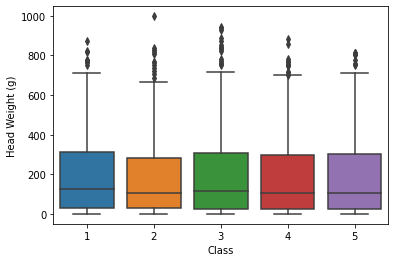

In [ ]:
#Average Head Weight in grams with respect to class
sns.boxplot(x="Class", y="Head Weight (g)", data=df_plants)

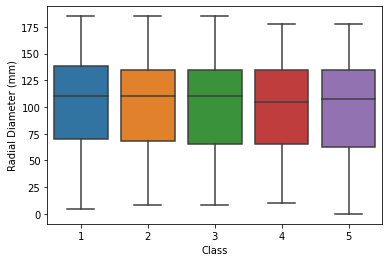

In [ ]:
#Average Radial Diameter in mm with respect to class
sns.boxplot(x="Class", y="Radial Diameter (mm)", data=df_plants)

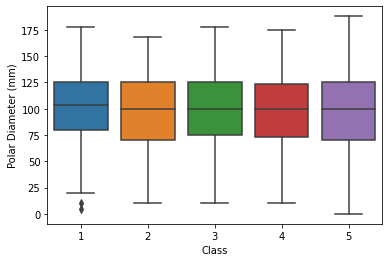

In [ ]:
#Average Polar Diameter in mm with respect to class
sns.boxplot(x="Class", y="Polar Diameter (mm)", data=df_plants)

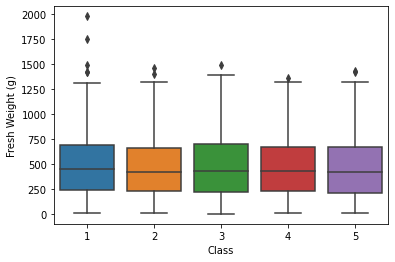

In [ ]:
#Average Fresh Weight in grams with respect to class
sns.boxplot(x="Class", y="Fresh Weight (g)", data=df_plants)

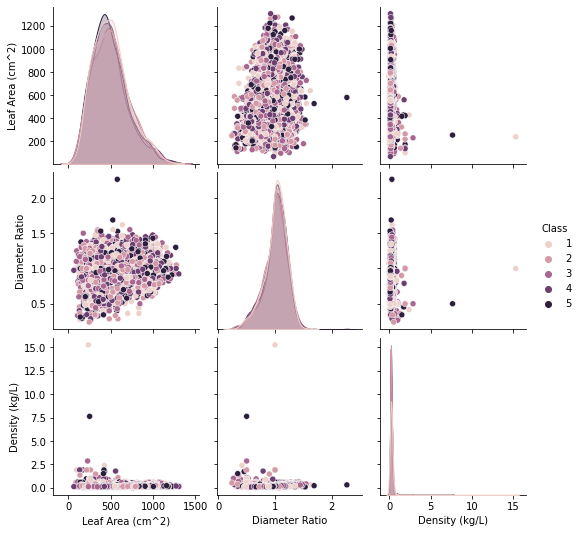

In [ ]:
#Pair plot to understand the relationship between Class and other attributes
temp = df_plants[['Class','Leaf Area (cm^2)','Diameter Ratio','Density (kg/L)']]
sns.pairplot(temp, hue="Class")


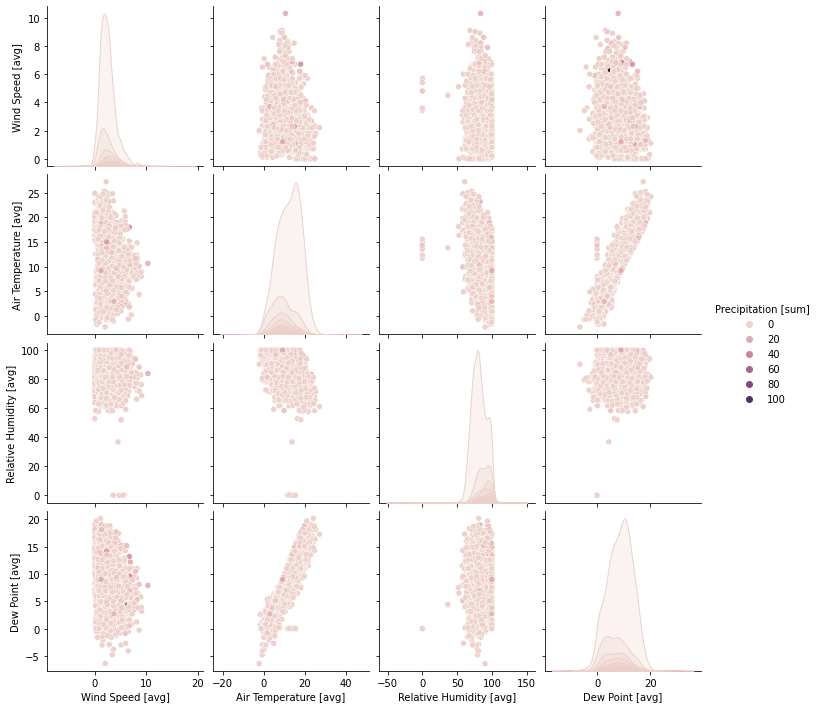

In [ ]:
#Pair plot to understand the relationship between Precipitation and other attributes
temp = df_weather_masked[['Wind Speed [avg]','Air Temperature [avg]','Relative Humidity [avg]','Dew Point [avg]','Precipitation [sum]']]
sns.pairplot(temp, hue="Precipitation [sum]")


In [ ]:
#Removing all non-Null Values from Remove Column
df_plants.drop(df_plants.index[df_plants['Remove'] == 'r'], inplace = True)
df_plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-07-01,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-07-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [ ]:
df_plants.isnull().sum()

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4689
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4271
Remove                  4789
dtype: int64

In [ ]:
df_weather = df_weather.dropna()

In [ ]:
#Checking for null values in df_weather
df_weather.isnull().sum()

Weather_Date               0
Solar Radiation [avg]      0
Precipitation [sum]        0
Wind Speed [avg]           0
Wind Speed [max]           0
Battery Voltage [last]     0
Leaf Wetness [time]        0
Air Temperature [avg]      0
Air Temperature [max]      0
Air Temperature [min]      0
Relative Humidity [avg]    0
Dew Point [avg]            0
Dew Point [min]            0
ET0 [result]               0
dtype: int64

In [ ]:
#Masking dates to avoid data leakage before feature selection
from datetime import date

today = date.today()
df_weather_masked = df_weather[df_weather['Weather_Date'] < '2021-01-01']

In [ ]:
#Latest date available in the masked weather dataset 
max(df_weather_masked['Weather_Date'])

Timestamp('2020-12-31 00:00:00')

In [ ]:
df_weather_masked

,Weather_Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
5,2014-05-19,261,0.0,3.0,6.4,6854,490,18.26,26.50,9.42,66.41,10.8,8.5,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,2020-12-27,42,3.6,5.1,12.8,6884,180,5.79,10.51,0.23,96.85,5.1,0.1,0.5
2380,2020-12-28,29,0.2,1.2,4.6,6864,0,0.88,2.67,-1.28,99.94,0.9,0.1,0.2
2381,2020-12-29,9,0.0,2.3,4.4,6786,0,1.77,2.70,0.43,99.94,1.6,0.3,0.2
2382,2020-12-30,46,0.0,1.7,3.7,6864,0,0.91,3.71,-1.56,99.94,0.8,0.0,0.1


In [ ]:
#Merge Plant and Masked Weather Data
Frame1 = [df_plants, df_weather_masked]
Merged_df = pd.concat(Frame1)
Merged_df

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),...,Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,6884.0,180.0,5.79,10.51,0.23,96.85,5.1,0.1,0.5
2380,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,6864.0,0.0,0.88,2.67,-1.28,99.94,0.9,0.1,0.2
2381,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,6786.0,0.0,1.77,2.70,0.43,99.94,1.6,0.3,0.2
2382,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,6864.0,0.0,0.91,3.71,-1.56,99.94,0.8,0.0,0.1


In [ ]:
#Check the latest date present in the data
Max_Date = max(Merged_df['Weather_Date'].dropna())

In [ ]:
#Dropping all NaN values from Plant Date column
#Merged_df = Merged_df.dropna(subset=['Plant Date'], thresh = 1)
Merged_df.fillna(0)

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),...,Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,402.0,2020-04-11 00:00:00,3.0,15.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
1,402.0,2020-04-11 00:00:00,4.0,15.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2,402.0,2020-04-11 00:00:00,1.0,16.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
3,402.0,2020-04-11 00:00:00,3.0,15.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
4,402.0,2020-04-11 00:00:00,3.0,15.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.8,6884.0,180.0,5.79,10.51,0.23,96.85,5.1,0.1,0.5
2380,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.6,6864.0,0.0,0.88,2.67,-1.28,99.94,0.9,0.1,0.2
2381,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.4,6786.0,0.0,1.77,2.70,0.43,99.94,1.6,0.3,0.2
2382,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.7,6864.0,0.0,0.91,3.71,-1.56,99.94,0.8,0.0,0.1


In [ ]:
Merged_df.isnull().sum()

Batch Number               2346
Plant Date                 2520
Class                      2346
Fresh Weight (g)           2347
Head Weight (g)            2451
Radial Diameter (mm)       2451
Polar Diameter (mm)        2451
Diameter Ratio             2453
Leaves                     7035
Density (kg/L)             2533
Leaf Area (cm^2)           2348
Square ID                  2346
Check Date                 2346
Flight Date                6617
Remove                     7135
Weather_Date               4789
Solar Radiation [avg]      4789
Precipitation [sum]        4789
Wind Speed [avg]           4789
Wind Speed [max]           4789
Battery Voltage [last]     4789
Leaf Wetness [time]        4789
Air Temperature [avg]      4789
Air Temperature [max]      4789
Air Temperature [min]      4789
Relative Humidity [avg]    4789
Dew Point [avg]            4789
Dew Point [min]            4789
ET0 [result]               4789
dtype: int64

In [ ]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7135 entries, 0 to 2383
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Batch Number             4789 non-null   float64       
 1   Plant Date               4615 non-null   datetime64[ns]
 2   Class                    4789 non-null   float64       
 3   Fresh Weight (g)         4788 non-null   float64       
 4   Head Weight (g)          4684 non-null   float64       
 5   Radial Diameter (mm)     4684 non-null   float64       
 6   Polar Diameter (mm)      4684 non-null   float64       
 7   Diameter Ratio           4682 non-null   float64       
 8   Leaves                   100 non-null    float64       
 9   Density (kg/L)           4602 non-null   float64       
 10  Leaf Area (cm^2)         4787 non-null   float64       
 11  Square ID                4789 non-null   float64       
 12  Check Date               4789 non-

In [ ]:
#Compute days_to_check column
days_to_check = Merged_df['Flight Date'] - Merged_df['Plant Date']
Merged_df['days_to_check'] = days_to_check

In [ ]:
#Converting datetime to float 
Merged_df['days_to_check'] = Merged_df.days_to_check.apply(lambda x: x.days)

In [ ]:
Merged_df

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),...,Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result],days_to_check
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6884.0,180.0,5.79,10.51,0.23,96.85,5.1,0.1,0.5,NaN
2380,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6864.0,0.0,0.88,2.67,-1.28,99.94,0.9,0.1,0.2,NaN
2381,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6786.0,0.0,1.77,2.70,0.43,99.94,1.6,0.3,0.2,NaN
2382,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6864.0,0.0,0.91,3.71,-1.56,99.94,0.8,0.0,0.1,NaN


In [ ]:
df_weather_masked

,Weather_Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
5,2014-05-19,261,0.0,3.0,6.4,6854,490,18.26,26.50,9.42,66.41,10.8,8.5,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,2020-12-27,42,3.6,5.1,12.8,6884,180,5.79,10.51,0.23,96.85,5.1,0.1,0.5
2380,2020-12-28,29,0.2,1.2,4.6,6864,0,0.88,2.67,-1.28,99.94,0.9,0.1,0.2
2381,2020-12-29,9,0.0,2.3,4.4,6786,0,1.77,2.70,0.43,99.94,1.6,0.3,0.2
2382,2020-12-30,46,0.0,1.7,3.7,6864,0,0.91,3.71,-1.56,99.94,0.8,0.0,0.1


In [ ]:
df_weather_masked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 1 to 2383
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Weather_Date             2346 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2346 non-null   int64         
 2   Precipitation [sum]      2346 non-null   float64       
 3   Wind Speed [avg]         2346 non-null   float64       
 4   Wind Speed [max]         2346 non-null   float64       
 5   Battery Voltage [last]   2346 non-null   int64         
 6   Leaf Wetness [time]      2346 non-null   int64         
 7   Air Temperature [avg]    2346 non-null   float64       
 8   Air Temperature [max]    2346 non-null   float64       
 9   Air Temperature [min]    2346 non-null   float64       
 10  Relative Humidity [avg]  2346 non-null   float64       
 11  Dew Point [avg]          2346 non-null   float64       
 12  Dew Point [min]          2346 non-

In [ ]:
data_x = Merged_df[['Solar Radiation [avg]','Precipitation [sum]','Wind Speed [avg]','Battery Voltage [last]']]
data_y = Merged_df[['Head Weight (g)','Radial Diameter (mm)','Polar Diameter (mm)','Diameter Ratio']]

In [ ]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4789 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4789 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4789 non-null   int64         
 3   Fresh Weight (g)      4788 non-null   float64       
 4   Head Weight (g)       4684 non-null   float64       
 5   Radial Diameter (mm)  4684 non-null   float64       
 6   Polar Diameter (mm)   4684 non-null   float64       
 7   Diameter Ratio        4682 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4602 non-null   float64       
 10  Leaf Area (cm^2)      4787 non-null   float64       
 11  Square ID             4789 non-null   int64         
 12  Check Date            4789 non-null   datetime64[ns]
 13  Flight Date       

In [ ]:
X = data_x.values
Y = data_y.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

ValueError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set results

Y_Pred = regressor.predict(X_Test)

ValueError: ignored